<a href="https://colab.research.google.com/github/mdkamrulhasan/data_mining_kdd/blob/main/notebooks/Classification_breast_cancer_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What will we cover today ?


1.   Four models:

 *   Logistic Rregression (LR)
 *   Feed forward Neural Network (NN)
 *   Random Forest (RF)
 *   Support Vectror Classification (SVR)
 *   Boosting
 *   Naive Bayes


In [1]:
import numpy as np
import pandas as pd
# Models (Sklearn)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# Data and Evaluation packages
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
# visualization
import plotly.express as px

[Data description](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

In [2]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer(as_frame=True)
print(df.data.shape)

(569, 30)


In [3]:
df.data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X, y = datasets.load_breast_cancer(return_X_y=True)
X.shape, y.shape

((569, 30), (569,))

## Unique y values (i.e the labels)

In [5]:
set(y)

{0, 1}

## Are the feature values scaled/normalized ?

In [6]:
X.min(), X.max()

(0.0, 4254.0)

## Lets normalize the features.

In [7]:
from sklearn.preprocessing import MinMaxScaler
# feature_scaler = MinMaxScaler()
# X_scaled = feature_scaler.fit_transform(X)

In [8]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

In [9]:
X_scaled.min(), X_scaled.max()

(-3.1120847879199744, 12.072680399588076)

In [10]:
X = X_scaled



```
# This is formatted as code
```
Random  Train-Test splits

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

## Training and Testing a LR model

In [12]:
# Create linear regression object
# regr = LinearRegression()
clf = LogisticRegression()
# Train the model using the training sets
clf.fit(X_train, y_train)

LogisticRegression()

Regression model parameters

In [13]:
# Make predictions using the testing set
y_pred = clf.predict(X_test)
# The mean squared error
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))

accuracy: 0.96


## Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

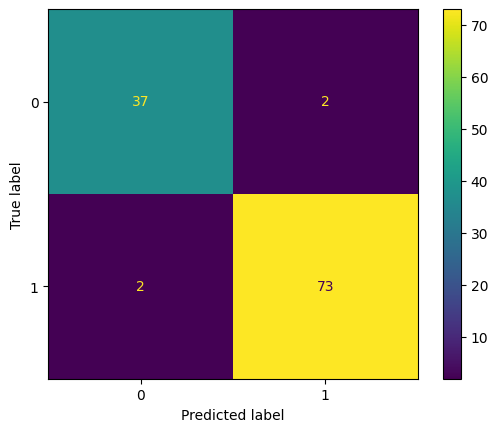

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

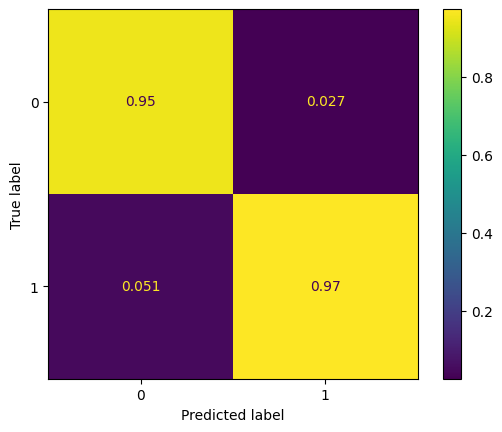

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm/cm.sum(axis=0),
                              display_labels=clf.classes_)
disp.plot()
plt.show()

Feed Forward Neural Network (NN)

[sklearn NN documentation](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)

In [17]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',
                    alpha=1e-5,
                    hidden_layer_sizes=(100, 100, 100, 100, 100),
                    random_state=1,
                    max_iter=1000,
                    # early_stopping=True,
                    # learning_rate="adaptive",
                    # tol=0.001
                    )
# Train the model using the training sets
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 100, 100, 100, 100),
              max_iter=1000, random_state=1, solver='lbfgs')

In [18]:
# Make predictions using the testing set
y_pred = clf.predict(X_test)
# The mean squared error
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))

accuracy: 0.96


We may not achieve better results as here data is too tiny. NNs are generally good for when you have lots lots of data!!

You can try for different parameters/setups.

## Random splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((455, 30), (455,), (114, 30), (114,))

## Our Wrapper Class (Can take any model as an input)

In [ ]:
from sklearn.model_selection import cross_val_score

class myClassificationModel:
  def __init__(self, model):
    self.model = model
    self.nb_cv_splits = 5
    self.evaluation_metrics = 'accuracy' #'f1'

  def train(self, X, y):
    self.model.fit(X, y)

  def evaluate(self, X, y):
    y_predict = self.model.predict(X)
    # return mean_squared_error(y, y_predict)
    return accuracy_score(y, y_predict)

  def cv_error(self, X, y):
    return cross_val_score(self.model,
                           X,
                           y, scoring=self.evaluation_metrics,
                           cv=self.nb_cv_splits)



## Logistic Regression (LR)

In [ ]:
my_model = myClassificationModel(LogisticRegression())
my_model.train(X_train, y_train)
print('train-error', my_model.evaluate(X_train, y_train))
print('test-error', my_model.evaluate(X_test, y_test))

train-error 0.9882629107981221
test-error 0.958041958041958


In [ ]:
cv_scores = my_model.cv_error(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

cross validation scores: [0.98591549 0.98611111 0.97959184 0.97931034 0.9929078 ]
cross validation score (mean): 0.9847673174099155
cross validation score (std): 0.005019077972634696


NN

In [ ]:
my_model = myClassificationModel(MLPClassifier())
my_model.train(X_train, y_train)
print('train-error', my_model.evaluate(X_train, y_train))
print('test-error', my_model.evaluate(X_test, y_test))

train-error 0.9906103286384976
test-error 0.972027972027972


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
cv_scores = my_model.cv_error(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


cross validation scores: [0.98591549 0.97902098 0.95890411 0.97931034 0.98571429]
cross validation score (mean): 0.9777730424219279
cross validation score (std): 0.009892624691661531


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Random Forest (RF)

In [ ]:
my_model = myClassificationModel(RandomForestClassifier())
my_model.train(X_train, y_train)
print('train-error', my_model.evaluate(X_train, y_train))
print('test-error', my_model.evaluate(X_test, y_test))

NameError: ignored

In [ ]:
cv_scores = my_model.cv_error(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

cross validation scores: [0.93684211 0.97368421 0.95767196]
cross validation score (mean): 0.9560660911538105
cross validation score (std): 0.015083529328619378


## Support Vector Classifier (SVC)

In [ ]:
my_model = myClassificationModel(SVC())
my_model.train(X_train, y_train)
print('train-error', my_model.evaluate(X_train, y_train))
print('test-error', my_model.evaluate(X_test, y_test))

train-error 0.9846153846153847
test-error 0.9736842105263158


In [ ]:
cv_scores = my_model.cv_error(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

cross validation scores: [0.97368421 0.97894737 0.98412698]
cross validation score (mean): 0.9789195210247842
cross validation score (std): 0.0042632899445391274


## Boosting

In [ ]:
my_model = myClassificationModel(GradientBoostingClassifier())
my_model.train(X_train, y_train)
print('train-error', my_model.evaluate(X_train, y_train))
print('test-error', my_model.evaluate(X_test, y_test))

train-error 1.0
test-error 0.9736842105263158


In [ ]:
cv_scores = my_model.cv_error(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

cross validation scores: [0.94736842 0.96842105 0.95238095]
cross validation score (mean): 0.9560568086883876
cross validation score (std): 0.008979133729353014


## Naive Bayes

In [ ]:
my_model = myClassificationModel(GaussianNB())
my_model.train(X_train, y_train)
print('train-error', my_model.evaluate(X_train, y_train))
print('test-error', my_model.evaluate(X_test, y_test))

train-error 0.9472527472527472
test-error 0.9035087719298246


In [ ]:
cv_scores = my_model.cv_error(X, y)
print('cross validation scores:', cv_scores)
print('cross validation score (mean):', np.mean(cv_scores))
print('cross validation score (std):', np.std(cv_scores))

cross validation scores: [0.91052632 0.94736842 0.93121693]
cross validation score (mean): 0.9297038893530122
cross validation score (std): 0.015078730092791377
